## Results of the clauses experiment and the syntactic sketch knockout experiments

In [1]:
import os, os.path
import re

from pandas import DataFrame as df
from pandas import read_csv
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
input_dir = 'edt_2.6'   # Experiments done on Estonian Dependency Treebank version 2.6

for fname in os.listdir(input_dir):
    if fname.startswith('results_') and fname.endswith('.csv'):
        print(fname)

results_crossvalidation.csv
results_ensemble_conf_intervals.csv
results_ensemble_entropy.csv
results_ensemble_majority_voting.csv
results_full_data_malt_udpipe1.csv
results_gap_experiments.csv
results_gold_and_auto_ud_morph.csv
results_half_data.csv
results_smaller_data.csv
results_stanza_basic.csv
results_stanza_ME_conf_intervals.csv
results_stanza_ME_error_types.csv
results_stanza_ME_full_predict_on_clauses.csv
results_stanza_ME_full_predict_on_clauses_error_types.csv
results_stanza_ME_on_clauses.csv
results_stanza_ME_on_clauses_error_types.csv
results_stanza_ME_sketches_5groups_knockout.csv
results_stanza_ME_sketches_5groups_knockout_matrix.csv
results_stanza_ME_sketches_5randomgroups_knockout.csv
results_stanza_ME_sketches_5randomgroups_knockout_matrix.csv


In [3]:
pandas.set_option('display.max_colwidth', None)

### A. the clauses experiment: train/evaluate stanza on clauses instead of on sentences

In [4]:
# trained and evaluated on clauses
read_csv('edt_2.6/results_stanza_ME_on_clauses.csv', index_col=0)

,LAS_test,LAS_train,LAS_gap,UAS_test,UAS_train
experiment,,,,,
eval_stanza_morph_extended_on_clauses,0.8623,0.9298,0.0674,0.8924,0.9492


In [5]:
# for a comparison #1: trained and evaluated on sentences
full_data_results = read_csv('edt_2.6/results_stanza_basic.csv')
full_data_results[full_data_results['experiment'].str.contains('morph_extended')]

,experiment,LAS_test,LAS_train,LAS_gap,UAS_test,UAS_train,test_words,train_words
1,eval_stanza_morph_extended_full_data,0.8486,0.9176,0.0689,0.8782,0.9378,48491,389278


In [6]:
# for a comparison #2: trained on sentences and evaluated on clauses
read_csv('edt_2.6/results_stanza_ME_full_predict_on_clauses.csv', index_col=0)

,LAS_test,LAS_train,UAS_test,UAS_train,LAS_gap
experiment,,,,,
eval_stanza_morph_extended_full_predict_on_clauses,0.8544,0.9076,0.8873,0.9341,0.0532


In [7]:
# Error types of the model trained and evaluated on clauses
err_types1 = read_csv('edt_2.6/results_stanza_ME_on_clauses_error_types.csv', index_col=0)
err_types1[['E1', 'E2', 'E3', 'E1_impact', 'E2_impact', 'E3_impact', 'E1_rel_error', 'E2_rel_error', 'E3_rel_error', ]]

,E1,E2,E3,E1_impact,E2_impact,E3_impact,E1_rel_error,E2_rel_error,E3_rel_error
experiment,,,,,,,,,
stanza_ME_on_clauses_error_types_on_test,4501,327,337,0.8714,0.0633,0.0652,0.1405,0.0102,0.0555


In [8]:
# for a comparison #1: Error types of the model trained and evaluated on sentences
err_types2 = read_csv('edt_2.6/results_stanza_ME_error_types.csv', index_col=0)
err_types2[['E1', 'E2', 'E3', 'E1_impact', 'E2_impact', 'E3_impact', 'E1_rel_error', 'E2_rel_error', 'E3_rel_error', ]]

,E1,E2,E3,E1_impact,E2_impact,E3_impact,E1_rel_error,E2_rel_error,E3_rel_error
experiment,,,,,,,,,
stanza_ME_error_types_on_test,4821,398,1162,0.7555,0.0624,0.1821,0.1413,0.0117,0.1733


In [9]:
# for a comparison #2: Error types of the model trained on sentences and evaluated on clauses
err_types2 = read_csv('edt_2.6/results_stanza_ME_full_predict_on_clauses_error_types.csv', index_col=0)
err_types2[['E1', 'E2', 'E3', 'E1_impact', 'E2_impact', 'E3_impact', 'E1_rel_error', 'E2_rel_error', 'E3_rel_error', ]]

,E1,E2,E3,E1_impact,E2_impact,E3_impact,E1_rel_error,E2_rel_error,E3_rel_error
experiment,,,,,,,,,
stanza_ME_full_on_clauses_error_types_on_test,4774,352,355,0.871,0.0642,0.0648,0.149,0.011,0.0585


### B. the syntactic sketches knockout experiments

In [10]:
# Randomly grouped sketches
read_csv('edt_2.6/preannotated/morph_extended_clauses/top_50_sketches_5_groups.csv', index_col=0)

,grouped_sketches,support
0,[V]nsubj(L)obl(L);[V]nsubj(L)obl(L)obl(P);[S]advmod(L)cop(L)nsubj:cop(L);[S]cop(L)nsubj:cop(P);[V]aux(L)nsubj(L)obl(L);[V]obj(L)obl(L);[V]nsubj(L)xcomp(P);[V]obj(P)obl(L);[V]obj(P);[V]obj(L),4157
1,[S]nmod(L);[V]advmod(L)nsubj(P);[V]aux(L)nsubj(L)obj(L);[S]amod(L);[V]advmod(L);[V];[V]nsubj(L)obj(P);[S];[V]nsubj(L)obj(P)obl(L);[V]nsubj(P)obl(L),5167
2,[V]obj(L)obl(P);[V]nsubj(L)obj(L);[S]amod(L)cop(L)nsubj:cop(L);[V]advmod(L)obl(L);[S]cop(L)nmod(L)nsubj:cop(L);[V]advmod(L)nsubj(L)obj(L);[V]nsubj(L)obj(L)obl(P);[V]advmod(L)nsubj(L)obj(L)obl(L);[V]advmod(L)obj(L);[S]cop(L)nsubj:cop(L),3374
3,[V]nsubj(L)obj(L)obl(L);[S]advmod(L);[S]cop(L)nsubj:cop(L)obl(L);[V]nsubj(L)obl(P);[V]nsubj(P)obl(P);[V]advmod(L)nsubj(L)obl(P);[V]nsubj(L);[V]advmod(L)nsubj(L);[V]nsubj(L)xcomp(L);[V]obl(P),4904
4,[V]nsubj(L)obl(L)obl(L);[V]advmod(L)nsubj(L)obl(L);[V]aux(L);[X];[V]xcomp(P);[V]aux(L)nsubj(L);[S]nummod(L);[V]nsubj(P);[V]nsubj(P)obj(L);[V]obl(L),3332


In [11]:
# Test matrix: rows are test sets, columns are models
test_matrix = read_csv('edt_2.6/results_stanza_ME_sketches_5groups_knockout_matrix.csv', index_col=0)
test_matrix

,group0,group1,group2,group3,group4
group0,0.8931,0.9046,0.9107,0.9139,0.9093
group1,0.9193,0.9047,0.9189,0.9154,0.9154
group2,0.9293,0.9250,0.9131,0.9186,0.9246
group3,0.9136,0.9122,0.9186,0.8903,0.9168
group4,0.9194,0.9179,0.9204,0.9204,0.8947


In [12]:
all_figures = []

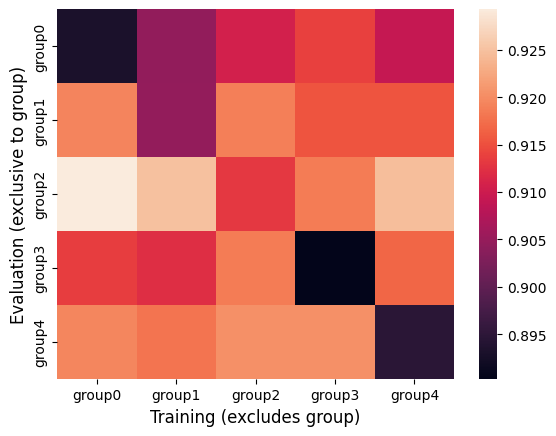

In [13]:
fig = sns.heatmap(test_matrix).get_figure()
plt.xlabel('Training (excludes group)', fontsize = 12)
plt.ylabel('Evaluation (exclusive to group)', fontsize = 12)
fig.savefig("sketches_5groups_knockout_matrix.pdf")
all_figures.append( fig )

In [14]:
# Random control group test matrix: rows are test sets, columns are models
rnd_test_matrix = read_csv('edt_2.6/results_stanza_ME_sketches_5randomgroups_knockout_matrix.csv', index_col=0)
rnd_test_matrix

,group0,group1,group2,group3,group4
group0,0.9114,0.9057,0.9150,0.9114,0.9100
group1,0.9129,0.9176,0.9154,0.9098,0.9154
group2,0.9198,0.9218,0.9230,0.9186,0.9198
group3,0.9179,0.9154,0.9136,0.9161,0.9182
group4,0.9239,0.9184,0.9184,0.9184,0.9204


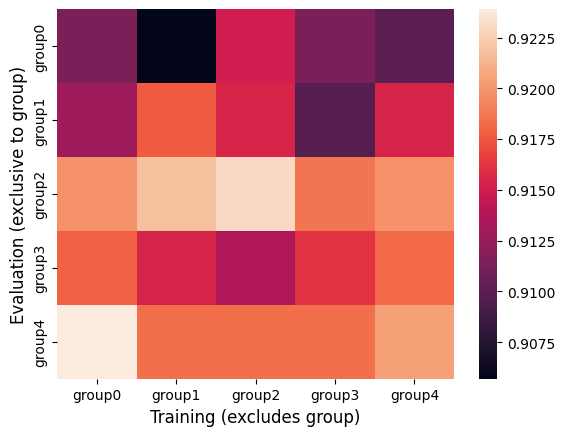

In [15]:
fig = sns.heatmap(rnd_test_matrix).get_figure()
plt.xlabel('Training (excludes group)', fontsize = 12)
plt.ylabel('Evaluation (exclusive to group)', fontsize = 12)
fig.savefig("sketches_5groups_random_knockout_matrix.pdf")
all_figures.append( fig )

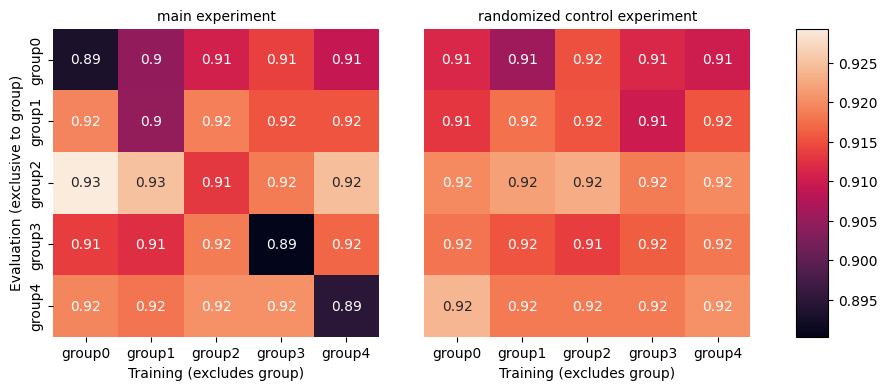

In [16]:
# Display both heatmaps on a single figure
import matplotlib.pyplot as plt

vmin = min(test_matrix.values.min(), rnd_test_matrix.values.min())
vmax = max(test_matrix.values.max(), rnd_test_matrix.values.max())

fig, axs = plt.subplots(ncols=3, gridspec_kw=dict(width_ratios=[10,10,1]), figsize=(10, 4))

sns.heatmap(test_matrix, annot=True, cbar=False, ax=axs[0], vmin=vmin, vmax=vmax)
sns.heatmap(rnd_test_matrix, annot=True, yticklabels=False, cbar=False, ax=axs[1], vmax=vmax, vmin=vmin)

axs[0].set_title('main experiment', fontsize = 10)
axs[1].set_title('randomized control experiment', fontsize = 10)
axs[0].set_xlabel('Training (excludes group)', fontsize = 10)
axs[1].set_xlabel('Training (excludes group)', fontsize = 10)
axs[0].set_ylabel('Evaluation (exclusive to group)', fontsize = 10)

fig.colorbar(axs[1].collections[0], cax=axs[2])

plt.show()

In [17]:
fig.savefig("sketches_5groups_both_experiment_matrices.pdf")

In [18]:
# Results on test_50x50 file
read_csv('edt_2.6/results_stanza_ME_sketches_5groups_knockout.csv', index_col=0).drop(['UAS_test'], axis=1)

,LAS_test
experiment,
eval_stanza_morph_extended_sketches_knockout_5groups_single_file_group0,0.9142
eval_stanza_morph_extended_sketches_knockout_5groups_single_file_group1,0.9126
eval_stanza_morph_extended_sketches_knockout_5groups_single_file_group2,0.9161
eval_stanza_morph_extended_sketches_knockout_5groups_single_file_group3,0.9108
eval_stanza_morph_extended_sketches_knockout_5groups_single_file_group4,0.9129


In [19]:
# Results on test_50x50 file (random control group)
read_csv('edt_2.6/results_stanza_ME_sketches_5randomgroups_knockout.csv', index_col=0).drop(['UAS_test'], axis=1)

,LAS_test
experiment,
eval_stanza_morph_extended_sketches_knockout_5randomgroups_single_file_group0,0.9169
eval_stanza_morph_extended_sketches_knockout_5randomgroups_single_file_group1,0.9154
eval_stanza_morph_extended_sketches_knockout_5randomgroups_single_file_group2,0.9169
eval_stanza_morph_extended_sketches_knockout_5randomgroups_single_file_group3,0.9148
eval_stanza_morph_extended_sketches_knockout_5randomgroups_single_file_group4,0.9165
